## Project : Health care
Build a model to accurately predict whether the patients in the dataset have diabetes or not?

#### Context:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

#### Problem Statement:
Build a model to accurately predict whether the patients in the dataset have diabetes or not?


#### Dataset Description:
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
> Pregnancies: Number of times pregnant

> Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

> BloodPressure: Diastolic blood pressure (mm Hg)

> SkinThickness: Triceps skin fold thickness (mm)

> Insulin: 2-Hour serum insulin (mu U/ml)

> BMI: Body mass index (weight in kg/(height in m)^2)

> DiabetesPedigreeFunction: Diabetes pedigree function

> Age: Age (years)

> Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0


In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Read the dataset
healthcare=pd.read_csv('health care diabetes.csv')

In [3]:
healthcare.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Approach:

#### 1. Perform descriptive analysis. It is very important to understand the variables and corresponding values. We need to think through - Can minimum value of below listed columns be zero (0)? On these columns, a value of zero does not make sense and thus indicates missing value.

•	Glucose

•	BloodPressure

•	SkinThickness

•	Insulin

•	BMI

In [5]:
healthcare.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Descriptive analysis shows the minimum value as zero for variables Glucose, Bloodpressure, Skin thickness, Insulin and BMI. Where as these values cannot be zero, it indicates missing values and need to be treated. Hence transform these zero values to Nan values

In [6]:
# Columns list with zero values
col_list=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [7]:
# Transforming the zero value to Nan values for the listed columns
for col in col_list:
    healthcare.loc[healthcare[col]==0,[col]]=np.nan

#### 2. Visually explore these variable, you may need to look for the distribution of these variables using histograms. Treat the missing values accordingly.

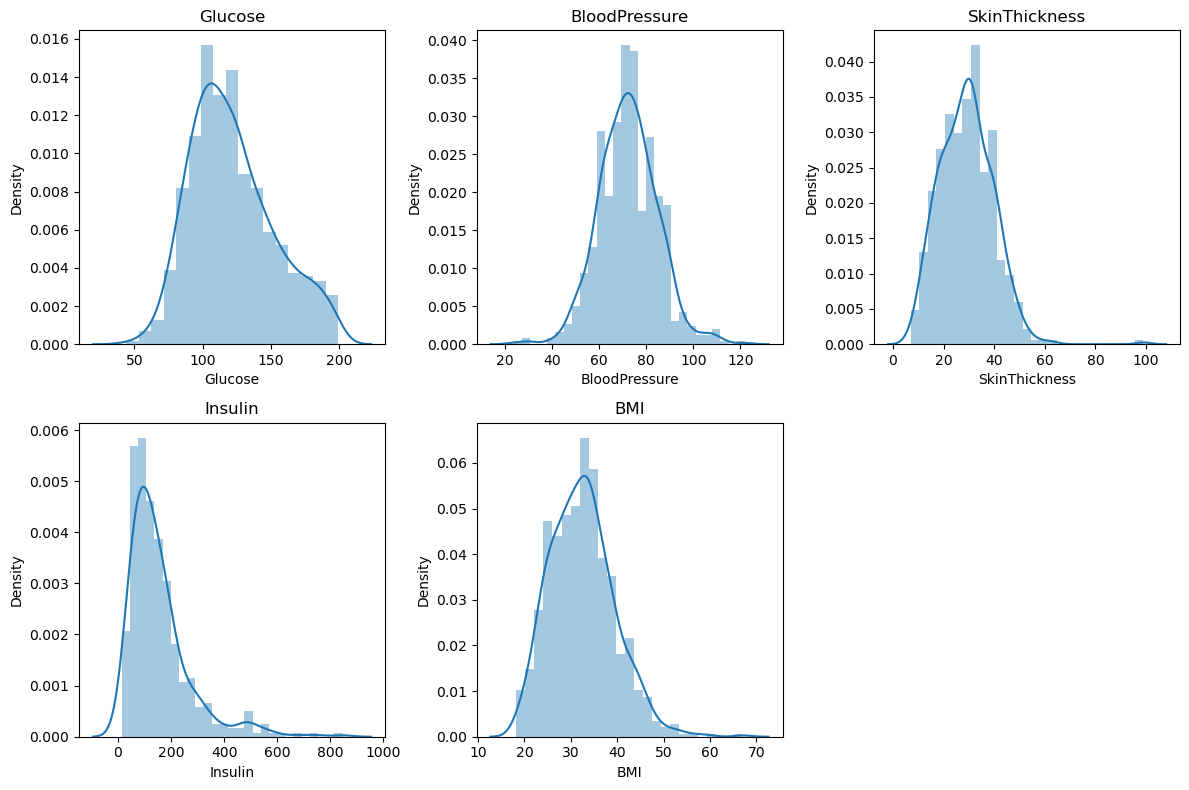

In [8]:
plt.figure(figsize=(12,8))
for i,col in enumerate(col_list):
    plt.subplot(2,3,i+1)
    sns.distplot(healthcare.loc[:,col])
    plt.title(col)
plt.tight_layout();     

From the above plot,it shows that the data is not normally distributed hence imputing the missing value (or zero values) with its corresponding median value

In [9]:
# Imputing the Nan values with its corresponding median Values
for col in col_list:
    healthcare[col].fillna(healthcare[col].median(),inplace=True)

In [10]:
## Checking null values
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#### 3. We observe integer as well as float data-type of variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [11]:
healthcare.dtypes.value_counts()

float64    6
int64      3
dtype: int64

<AxesSubplot:ylabel='count'>

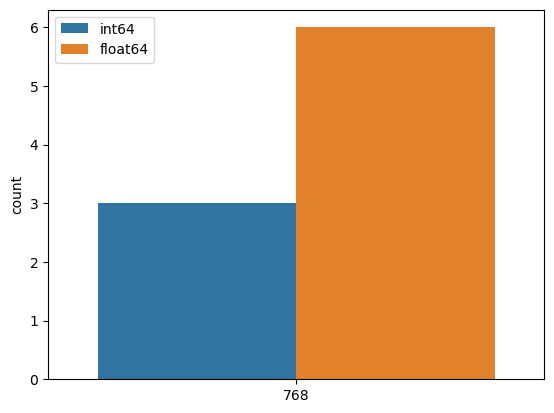

In [12]:
sns.countplot(healthcare.count(),hue=healthcare.dtypes)

Above Plot indicates in the dataset 3 variables have Integer data type  and 6 variables have Float data type

#### 4. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of actions.

In [13]:
# Counting the outcomes by their value 
healthcare.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
healthcare.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

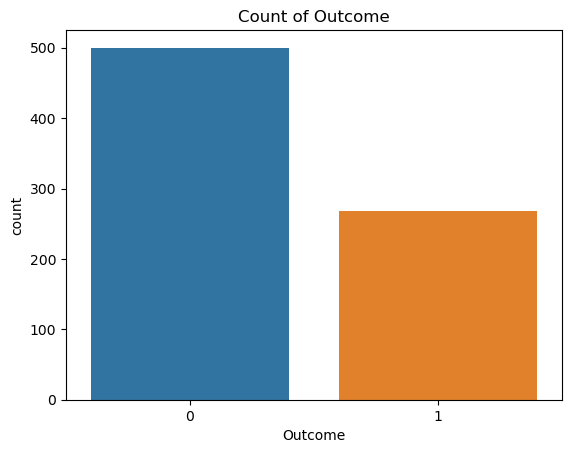

In [15]:
sns.countplot(healthcare['Outcome'])
plt.title('Count of Outcome');

The above plot shows that the target variable (Outcome) is unevenly distributed and indicates data imbalanced, where 65% are non diabetic and 35% are diabetic. Need to treat data using SMOTE technique before building the model

#### 5. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

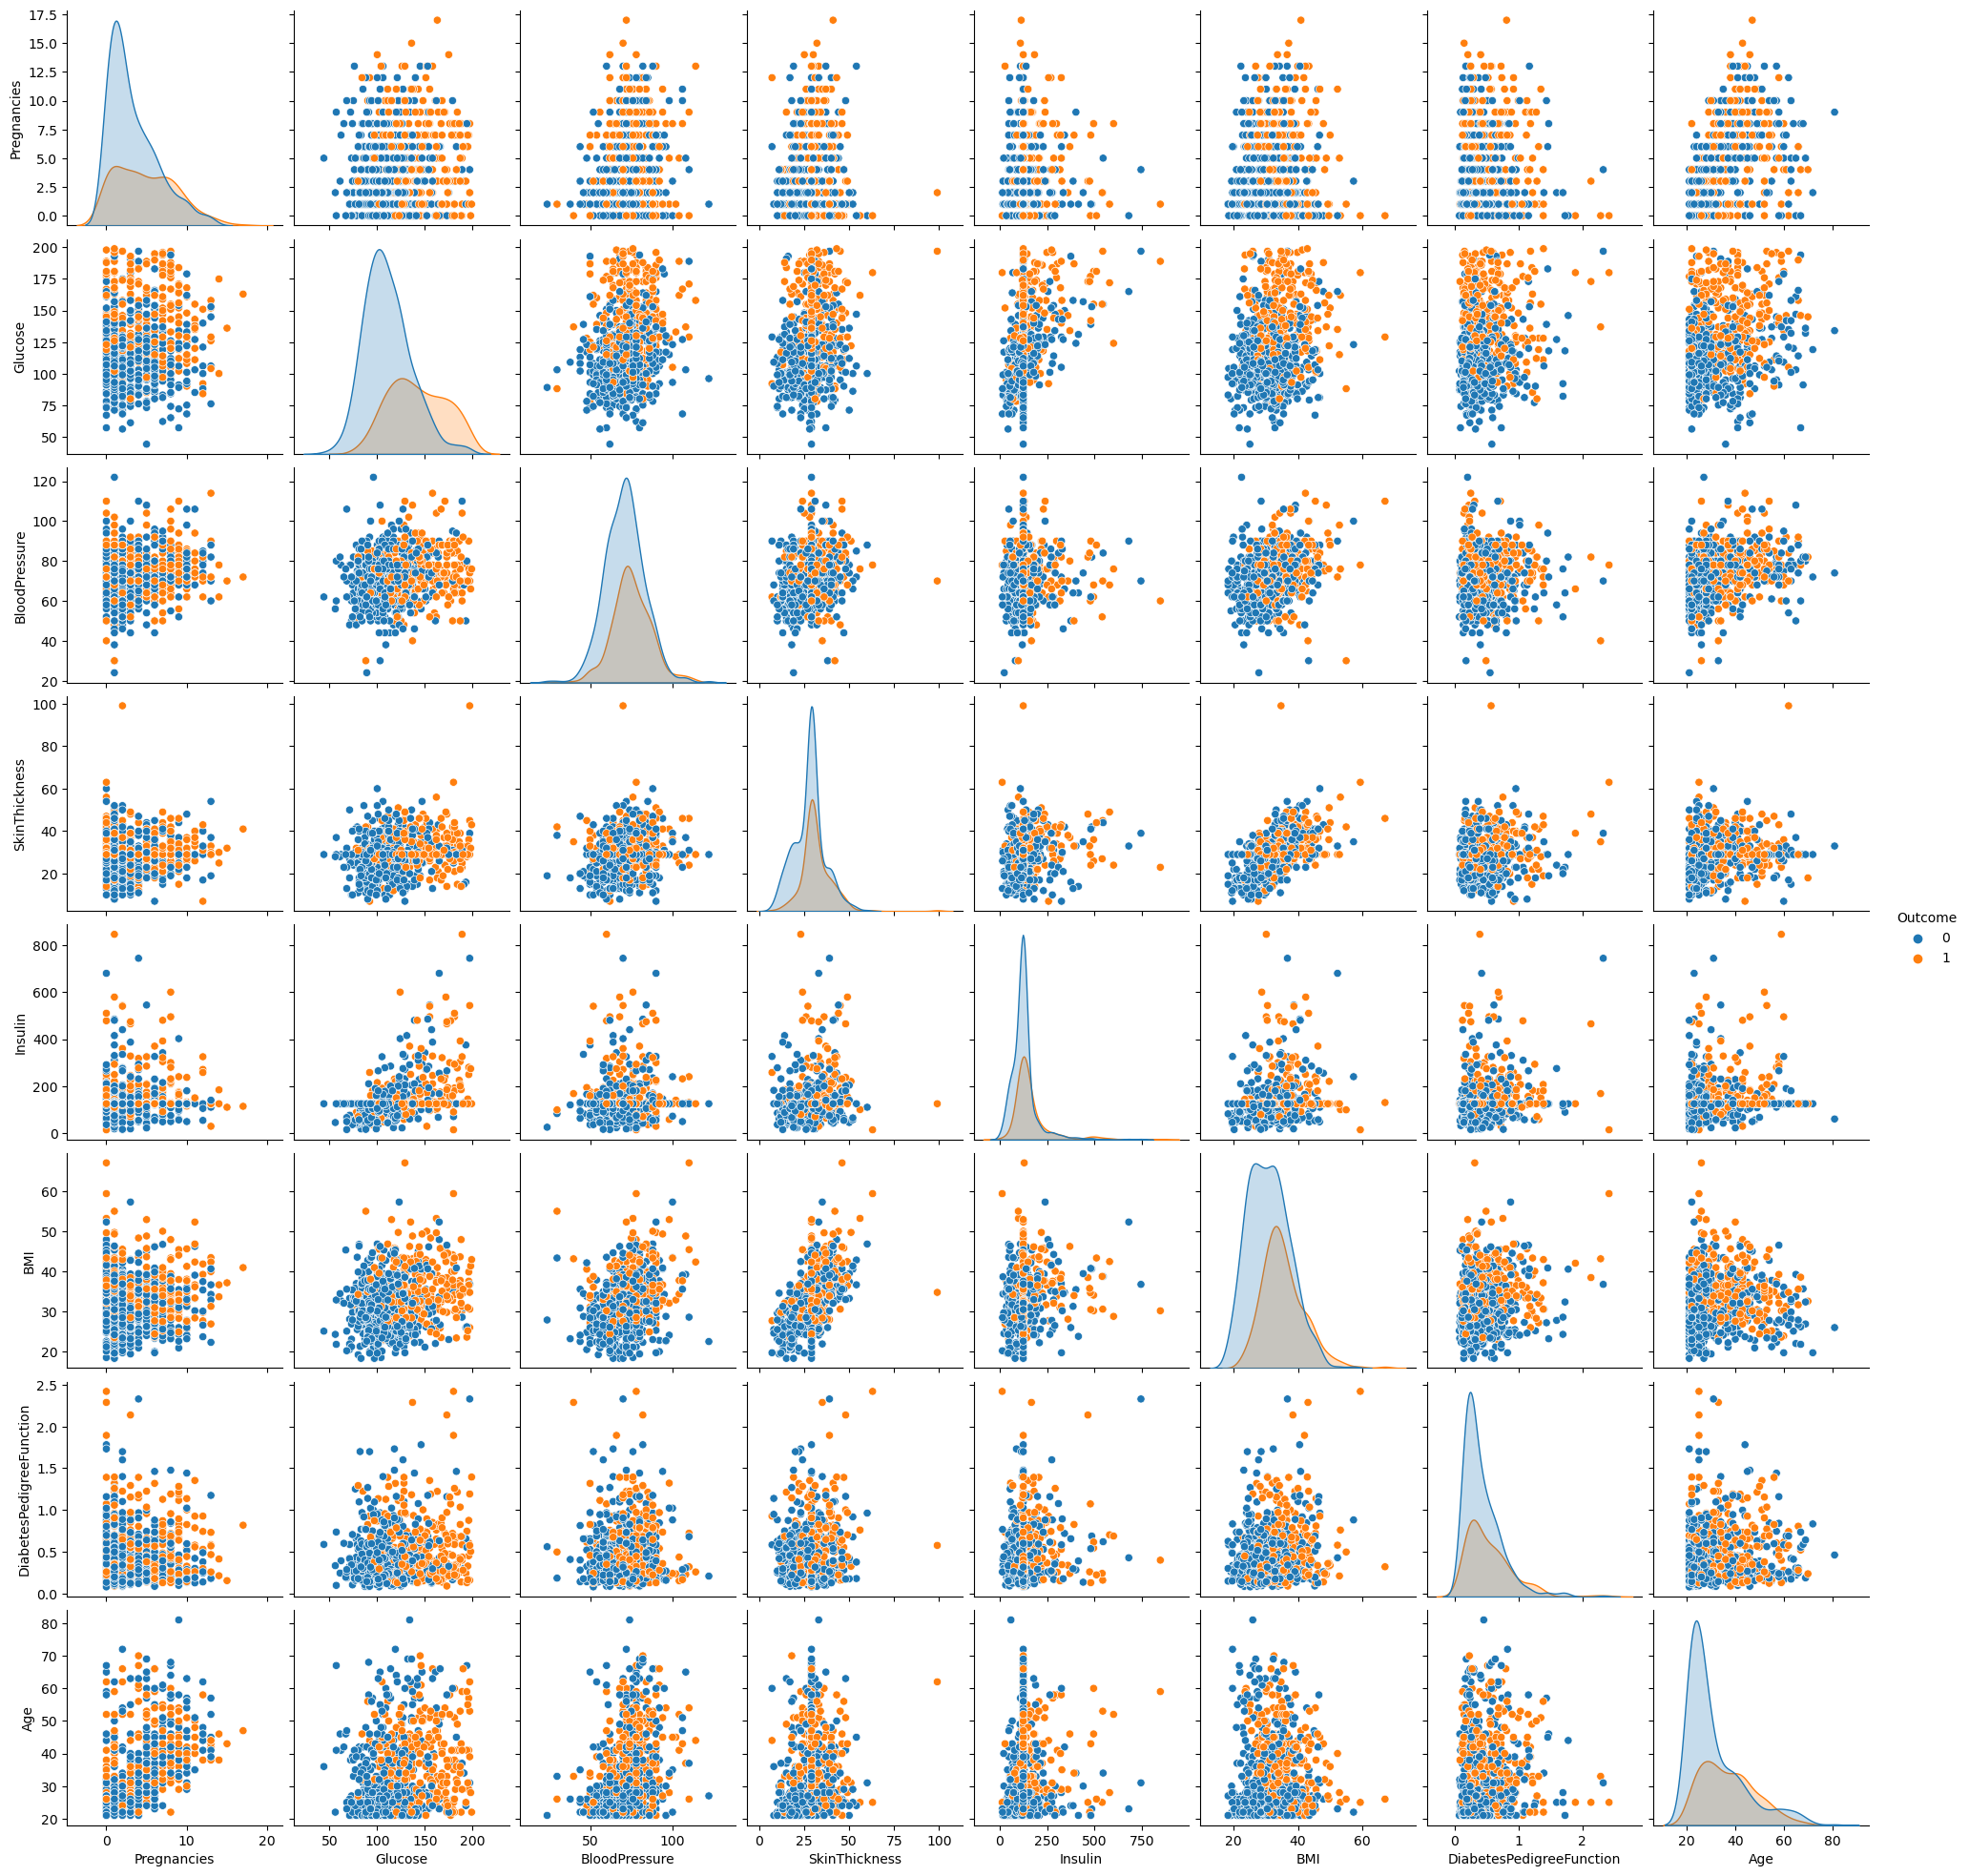

In [16]:
sns.pairplot(healthcare,kind='scatter',hue='Outcome')
plt.show()

Above Scatter Plots indicates all independent (input) varaiables have weak linear correlation.
and the diagonal plots shows the data distribution

#### 6. Perform correlation analysis. Visually explore it using a heat map.

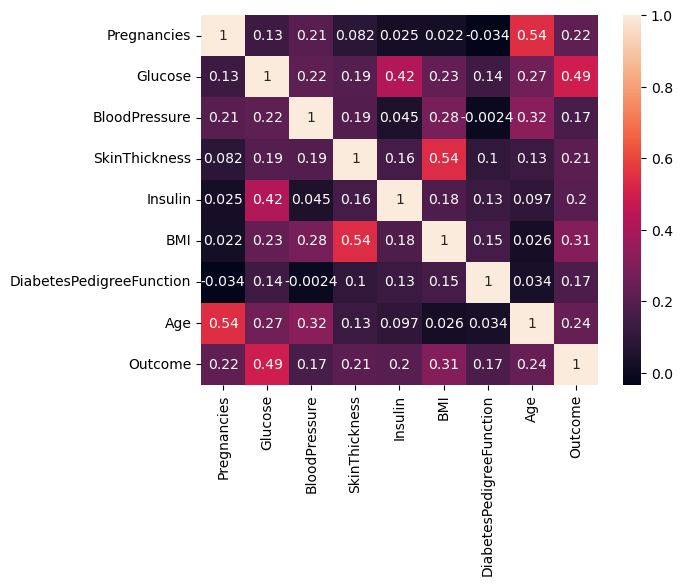

In [17]:
sns.heatmap(healthcare.corr(),annot=True);

Above fig shows, all the independent variales correlation coefficient varies between -0.034 to 0.54 which displays weak correlation between variables

#### 7. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?

1. Apply SMOTE technique to balance data and then prepare train and test data set

2. Apply ML model such as logistic regression,KNN model ,Support Vector Machine, decision tree, random forest, Gradient boost and adaboost 

3. Cross validation technique will help in building better model by lowering the bisas and variances and using Grid search CV to tune the hyperparameters to obtain the optimum accuracy

4. Then compare the model accuracy score of each model. Choose the Model with the best accuracy score, Create confusion matrics, the Classification report, AUC(ROC curve)


In [18]:
#Defining X and Y variables for the Model
X= healthcare.drop(['Outcome'],axis=1)
Y=healthcare['Outcome']

In [19]:
X.shape , Y.shape

((768, 8), (768,))

In [20]:
# Scaling the X Variables
scaler=StandardScaler()
X_scaled=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [21]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,2.544261e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,7.661695e-18,1.000652,-2.552931,-0.720163,-0.153073,0.611265,2.542658
BloodPressure,768.0,-1.123956e-17,1.000652,-4.002619,-0.693761,-0.031990,0.629782,4.104082
SkinThickness,768.0,-1.795800e-16,1.000652,-2.516429,-0.467597,-0.012301,0.329171,7.955377
Insulin,768.0,4.416317e-17,1.000652,-1.467353,-0.222085,-0.181541,-0.155477,8.170442
BMI,768.0,2.815312e-16,1.000652,-2.074783,-0.721209,-0.022590,0.603256,5.042397
DiabetesPedigreeFunction,768.0,2.462585e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,1.857600e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716


#### Applying SMOTE to balance the Data

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X_scaled,Y)
y_sm.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

Data is balanced considering the parameter sampling strategy as 'minority' to resample only the minority class that is diabetic

In [24]:
# Train and Test data split 
train_X,test_X,train_Y,test_Y=train_test_split(X_sm,y_sm,test_size=0.3,random_state=100,stratify=y_sm)

In [25]:
train_X.shape,test_X.shape,train_Y.shape,test_Y.shape

((700, 8), (300, 8), (700,), (300,))

In [26]:
train_Y.value_counts() , test_Y.value_counts()

(1    350
 0    350
 Name: Outcome, dtype: int64,
 0    150
 1    150
 Name: Outcome, dtype: int64)

#### a. Logistic Regression Model

In [27]:
log_reg=LogisticRegression()
log_reg.fit(train_X,train_Y)
metrics.accuracy_score(test_Y,log_reg.predict(test_X))

0.7266666666666667

In [28]:
cross_val_score(log_reg,X_sm,y_sm,cv=5).mean()

0.7550000000000001

In [29]:
Model_Performances= dict()

In [30]:
Model_Performances["logistic regression"]=cross_val_score(log_reg,X_sm,y_sm,cv=5).mean()

#### b. KNN Classifier

In [31]:
knn=KNeighborsClassifier()
knn.fit(train_X,train_Y)
print('Test Score:{}'.format(knn.score(test_X,test_Y)))

Test Score:0.7733333333333333


In [32]:
acc=list()
for n in range(2, int(np.sqrt(train_X.shape[0]))):
    knn= KNeighborsClassifier(n_neighbors=n)
    knn.fit(train_X,train_Y)
    acc.append(cross_val_score(knn,X_sm,y_sm,cv=5).mean())

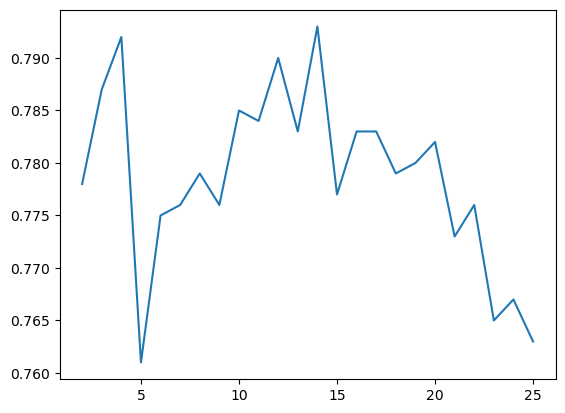

In [33]:
plt.plot(range(2, int(np.sqrt(train_X.shape[0]))),acc)

In [36]:
knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(train_X,train_Y)
knn.score(test_X,test_Y)

0.77

In [37]:
cross_val_score(knn,X_sm,y_sm,cv=5).mean()

0.7919999999999999

In [38]:
Model_Performances['K Nearest Neighbour']=cross_val_score(knn,X_sm,y_sm,cv=5).mean()

#### c.  Support Vector Machine

In [39]:
# Tuning hyperparameter for SVM using grid search
param_grid={ 'C':[0.001,0.01,0.1,1,10],'gamma':[0.001,0.01,0.1,1,10]}
gscv=GridSearchCV(SVC(),param_grid,cv=5,verbose=1)
gscv.fit(X_sm,y_sm)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             verbose=1)

In [40]:
gscv.best_estimator_

SVC(C=10, gamma=1)

In [41]:
cross_val_score(gscv.best_estimator_,X_sm,y_sm,cv=5).mean()

0.8399999999999999

In [42]:
Model_Performances['Support Vector Machine']=cross_val_score(gscv.best_estimator_,X_sm,y_sm,cv=5).mean()

#### d. Decision Tree Classifier

In [43]:
param_grid={'max_depth':[3,5,7,None],'min_samples_leaf':[3,5,7,9]}
gscv_DT=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,verbose=1)
gscv_DT.fit(X_sm,y_sm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [3, 5, 7, 9]},
             verbose=1)

In [44]:
gscv_DT.best_estimator_

DecisionTreeClassifier(min_samples_leaf=7)

In [45]:
cross_val_score(gscv_DT.best_estimator_,X_sm,y_sm,cv=5).mean()

0.764

In [46]:
Model_Performances['Decision Tree Classifier']=cross_val_score(gscv_DT.best_estimator_,X_sm,y_sm,cv=5).mean()

#### e. Random Forest Classifier

In [47]:
param_grid={ 'n_estimators':[50,100,150,200],'max_depth':[3,5,7,None],'min_samples_leaf':[3,5,7,9]}
gscv_RFC=GridSearchCV(RandomForestClassifier(),param_grid,cv=5,verbose=1)
gscv_RFC.fit(X_sm,y_sm)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [48]:
gscv_RFC.best_estimator_

RandomForestClassifier(min_samples_leaf=3, n_estimators=150)

In [49]:
cross_val_score(gscv_RFC.best_estimator_,X_sm,y_sm,cv=5).mean()

0.8039999999999999

In [50]:
Model_Performances['Random Forest Classifier']=cross_val_score(gscv_RFC.best_estimator_,X_sm,y_sm,cv=5).mean()

#### f. Gradient Boosting

In [51]:
GBC=GradientBoostingClassifier()
GBC.fit(train_X,train_Y)
GBC.score(test_X,test_Y)

0.7833333333333333

In [52]:
cross_val_score(GBC,X_sm,y_sm,cv=5).mean()

0.7929999999999999

In [53]:
Model_Performances['Gradient Boosting Classifier']=cross_val_score(GBC,X_sm,y_sm,cv=5).mean()

#### g. Adaptive Boosting classifier

In [54]:
param_grid={ 'n_estimators':[50,100,150,200],'base_estimator':[DecisionTreeClassifier(max_depth=5),DecisionTreeClassifier(max_depth=5)]}
gscv_AB=GridSearchCV(AdaBoostClassifier(),param_grid,cv=5,verbose=1)
gscv_AB.fit(X_sm,y_sm)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=5),
                                            DecisionTreeClassifier(max_depth=5)],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [55]:
gscv_AB.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=200)

In [56]:
cross_val_score(gscv_AB.best_estimator_,X_sm,y_sm,cv=5).mean()

0.8300000000000001

In [57]:
Model_Performances['Adaptive Boosting Classifier']=cross_val_score(gscv_AB.best_estimator_,X_sm,y_sm,cv=5).mean()

#### 8. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.

In [58]:
# Compare all the Model Performances
Model_performance=pd.DataFrame(Model_Performances.items(),columns=['Classifier-Model','Model_Performance'])
Model_performance

,Classifier-Model,Model_Performance
0,logistic regression,0.755
1,K Nearest Neighbour,0.792
2,Support Vector Machine,0.840
3,Decision Tree Classifier,0.760
4,Random Forest Classifier,0.810
5,Gradient Boosting Classifier,0.794
6,Adaptive Boosting Classifier,0.821


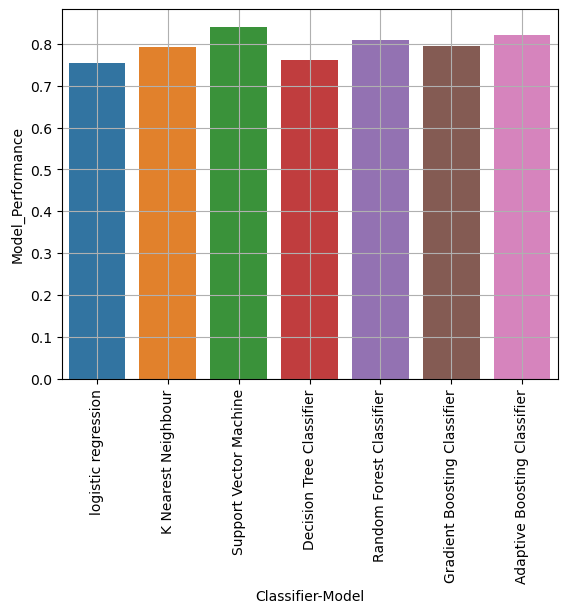

In [59]:
sns.barplot(data=Model_performance,x='Classifier-Model',y='Model_Performance')
plt.xticks(rotation=90)
plt.grid(True)

Comparision of the model performances indicates, Support Vector Machine, Random forest and Adaboost accuracy score is above 0.8 with a highest score of 0.84 for support vector machine

#### Final Classifier model- Support Vector Machine

In [60]:
svc=SVC(C=10, gamma=1)
svc.fit(train_X,train_Y)
svc.score(test_X,test_Y)

0.8366666666666667

#### 9.	Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?

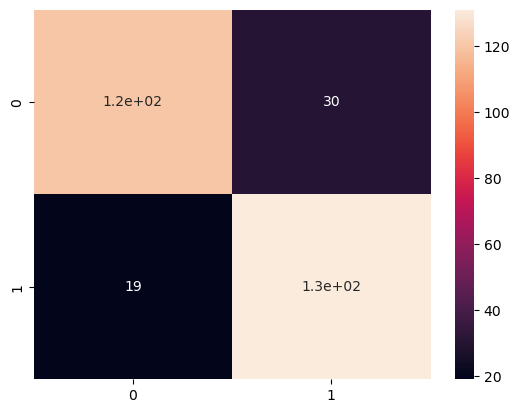

In [61]:
# Confusion Matrix
sns.heatmap(metrics.confusion_matrix(test_Y,svc.predict(test_X)),annot=True);

In [62]:
print(metrics.classification_report(test_Y,svc.predict(test_X)))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       150
           1       0.81      0.87      0.84       150

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



The Accuracy score of the model is 84% and with f1 score of 0.84

In [63]:
y_pred = svc.decision_function(test_X)
fpr_svc, tpr_svc , _= roc_curve(test_Y, y_pred )
roc_auc_svc = auc(fpr_svc, tpr_svc)
print("Area under ROC curve = {:0.2f}".format(roc_auc_svc))

Area under ROC curve = 0.91


AUC value measures the degree of seperability in the classification model. In the above calculation AUC value is 0.91 which is between 0.9-1 which is considered as good score 

In [64]:
# Transfering the healthcare dataframe to excel for preparing the report in Tableau
healthcare.to_excel('healthcare.xlsx')